Import the dataset provided into a Pandas dataframe and print out the skewness of each numeric feature

In [1]:
# Question 1:
import pandas as pd
df = pd.read_csv('student_enrollment_clean.csv')
skewness = df.skew(numeric_only=True)

# print the skewness
print("\nSkewness of numeric features:")
print(skewness)




Skewness of numeric features:
ENROLL_COUNT             0.000000
NUMBER_AVERAGE           1.616012
HOURS_ATTEMPTED          3.272376
HOURS_EARNED             3.457838
AR_BALANCE_AMOUNT        4.232079
DAYS_ABSENT              0.000000
REENTRY_NUMBER         122.418680
MOD_NUMBER              -0.159215
COHORT_YEAR             -0.956432
AR_BALANCE               4.443662
ENROLLMENT_GPA           1.701210
CREDITS_ATTEMPTED        3.239262
CREDITS_EARNED           3.430428
CREDITS_REQUIRED        -1.181961
CREDITS_LEFT            -1.177201
ENROLLMENT_COUNT         2.823956
MODS_ATTENDED_COUNT      3.241725
HS_GRADUATED_FLAG        0.000000
DISABLED_FLAG          212.049523
HISPANIC_FLAG            2.763751
VETERAN_FLAG             8.332229
IN_SCHOOL_FLAG           1.877308
dtype: float64


As you can see, there are many skewness issues. Let's begin by fixing the skewness of NUMBER_AVERAGE by using one of the three options covered in the book (not including binning). Determine which option gets the skewness closest to zero. Remove any other version.

Print out the new skewness scores. 

In [2]:
# Question 2:
import numpy as np
df['NUMBER_AVERAGE_log'] = np.log1p(df['NUMBER_AVERAGE'])

# 2. Square root transformation
df['NUMBER_AVERAGE_sqrt'] = np.sqrt(df['NUMBER_AVERAGE'])

# 3. Cube root transformation
df['NUMBER_AVERAGE_cbrt'] = np.cbrt(df['NUMBER_AVERAGE'])

# Calculate skewness again for all options
new_skewness = df[['NUMBER_AVERAGE', 'NUMBER_AVERAGE_log', 'NUMBER_AVERAGE_sqrt', 'NUMBER_AVERAGE_cbrt']].skew()
print("\nSkewness after applying transformations:")
print(new_skewness)


print("It appears the best one is: NUMBER_AVERAGE_log at 1.491496")
df.drop(columns=['NUMBER_AVERAGE_sqrt', 'NUMBER_AVERAGE_cbrt'], inplace=True)







Skewness after applying transformations:
NUMBER_AVERAGE         1.616012
NUMBER_AVERAGE_log     1.491496
NUMBER_AVERAGE_sqrt    1.524336
NUMBER_AVERAGE_cbrt    1.501684
dtype: float64
It appears the best one is: NUMBER_AVERAGE_log at 1.491496


As you can see, we were still not able to get the skewness within an acceptable range. Several of the other features will have the same problem. Therefore, let's trying binning these features instead. Let's start by binning the ENROLLMENT_COUNT feature. Select the number of bins that gets the skewness score closest to zero. Print both the line chart depicting the various skewness scores attempted as well as the actual skewness value of the new binned version (exactly like is done in the book). 

Save this new binned version of the ENROLLMENT_COUNT feature in the DataFrame and remove any other version. Also, print out the first five records of this revised DataFrame

**HINT: Copy the code from the Practice 4 Problem**

ENROLLMENT_COUNT         2.823956
ENROLLMENT_COUNT_SQRT    1.968341
ENROLLMENT_COUNT_CBRT    1.783883
ENROLLMENT_COUNT_LN1P    1.757939
dtype: float64
Skewness of binned ENROLLMENT_COUNT: 1.0027134763523267
  EXPECTED_START_DATE GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
0           6/22/2020       6/23/2020             1       78.962963   
1           6/22/2020      12/19/2021             1        0.000000   
2           6/22/2020      10/24/2021             1       98.100000   
3           6/22/2020       6/27/2020             1        0.000000   
4           6/22/2020       7/14/2020             1        0.000000   

   HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
0            450.0         450.0                0.0            0   
1              0.0           0.0                0.0            0   
2            710.0         710.0             2567.0            0   
3              0.0           0.0                0.0            0   
4              0.0        

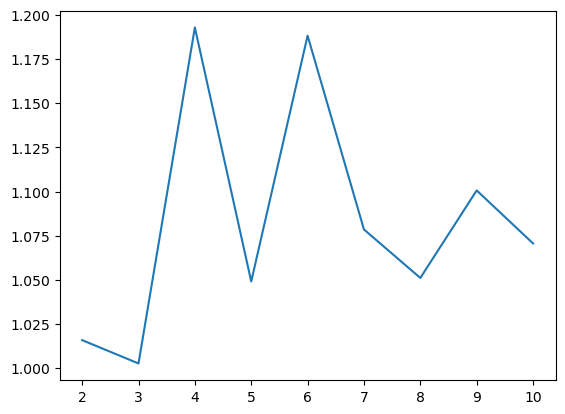

In [3]:
import pandas as pd
import scipy.stats
import seaborn as sns
import numpy as np

enrollment_count = df['ENROLLMENT_COUNT']

df['ENROLLMENT_COUNT_SQRT'] = df['ENROLLMENT_COUNT']**(1/2)
df['ENROLLMENT_COUNT_CBRT'] = df['ENROLLMENT_COUNT']**(1/3)
df['ENROLLMENT_COUNT_LN1P'] = np.log1p(df['ENROLLMENT_COUNT'])


print(df[['ENROLLMENT_COUNT', 'ENROLLMENT_COUNT_SQRT', 'ENROLLMENT_COUNT_CBRT', 'ENROLLMENT_COUNT_LN1P']].skew())


def bin_numeric(series, custom_bins=False): 
    from scipy.stats import norm
    import numpy as np
    import scipy.stats
    import seaborn as sns
    
    def bin(bins): 
        edges = np.linspace(-3, 3, bins)
        edges = norm.cdf(edges)
        edges = list(np.quantile(series, edges))
        edges.append(max(series))
    
        new_series = []
        for value in list(series): 
            for edge in edges:
                if value <= edge:
                    new_series.append(edges.index(edge))
                    break
        return new_series
    
    if custom_bins:
        bins = 2
        skews = []
        while bins < series.nunique(): 
            skews.append(scipy.stats.skew(bin(bins)))  
            bins += 1
        sns.lineplot(x=range(2, series.nunique()), y=skews) 
        return bin(skews.index(min(skews)) + 2) 
    else:
        bins = int(2 * len(list(series)) ** (3 / 5))
        return bin(bins)

binned_enrollment = bin_numeric(enrollment_count, custom_bins=True)

df['ENROLLMENT_COUNT'] = binned_enrollment

skewed_binned = scipy.stats.skew(df['ENROLLMENT_COUNT'])
print(f"Skewness of binned ENROLLMENT_COUNT: {skewed_binned}")
df.drop(columns=['ENROLLMENT_COUNT_SQRT', 'ENROLLMENT_COUNT_CBRT', 'ENROLLMENT_COUNT_LN1P'], inplace=True)

# Print the first five records of the revised DataFrame
print(df.head())




As you can see, there are a couple of features with skewness scores over 100. It's very unlikely that we can do anything with those. **Run the following code** to create a loop that will examine each of those skewness scores and drop any column that has a skewness score greater than 10. Print the skewness of the remaining columns again.

In [4]:

import pandas as pd

numeric_df = df.select_dtypes(include=['number'])

skewness_scores = numeric_df.skew()
print("Initial skewness scores:")
print(skewness_scores)

for col in skewness_scores.index:
    if abs(skewness_scores[col]) > 10:
        df.drop(columns=col, inplace=True)
        
numeric_df = df.select_dtypes(include=['number'])
print("\nSkewness scores after dropping columns with skewness > 10:")
print(numeric_df.skew())


Initial skewness scores:
ENROLL_COUNT             0.000000
NUMBER_AVERAGE           1.616012
HOURS_ATTEMPTED          3.272376
HOURS_EARNED             3.457838
AR_BALANCE_AMOUNT        4.232079
DAYS_ABSENT              0.000000
REENTRY_NUMBER         122.418680
MOD_NUMBER              -0.159215
COHORT_YEAR             -0.956432
AR_BALANCE               4.443662
ENROLLMENT_GPA           1.701210
CREDITS_ATTEMPTED        3.239262
CREDITS_EARNED           3.430428
CREDITS_REQUIRED        -1.181961
CREDITS_LEFT            -1.177201
ENROLLMENT_COUNT         1.002747
MODS_ATTENDED_COUNT      3.241725
HS_GRADUATED_FLAG        0.000000
DISABLED_FLAG          212.049523
HISPANIC_FLAG            2.763751
VETERAN_FLAG             8.332229
IN_SCHOOL_FLAG           1.877308
NUMBER_AVERAGE_log       1.491496
dtype: float64

Skewness scores after dropping columns with skewness > 10:
ENROLL_COUNT           0.000000
NUMBER_AVERAGE         1.616012
HOURS_ATTEMPTED        3.272376
HOURS_EARNED          